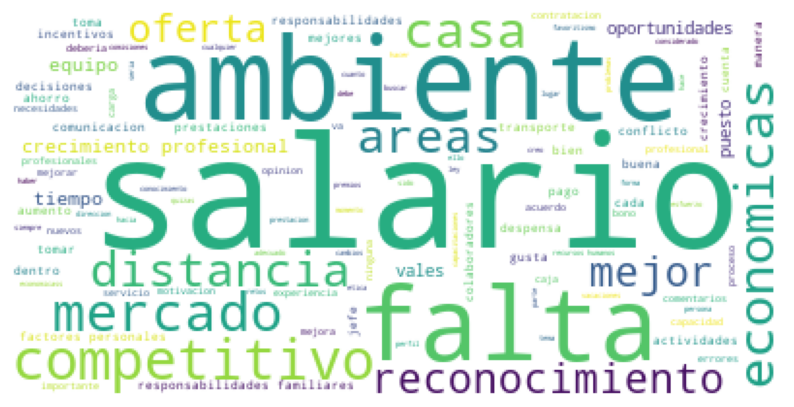

In [2]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import pandas as pd
import re

# Descargar las stopwords de NLTK si es la primera vez que lo usas
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')
except LookupError:
     nltk.download('stopwords')


# Cargar las stopwords en español
stop_words = set(stopwords.words('spanish'))

# Tus stopwords personalizadas adicionales
custom_stopwords = {'a', 'al', 'asi', 'buenas', 'buenos', 'claro', 'com', 'como', 'con', 'cual', 'cuando', 'de', 'del', 'despues',
                    'después', 'dia', 'dias', 'donde', 'dos', 'el', 'embargo', 'en', 'encuesta', 'entre', 'es', 'esta', 'este',
                    'favor', 'gracia', 'gracias', 'gustaria', 'hasta', 'hola', 'inscomexico', 'la', 'las', 'le', 'les', 'lo', 'los',
                    'mas', 'me', 'mi', 'misma', 'muchas', 'muy', 'más', 'ni', 'ninguno', 'no', 'nos', 'o', 'para', 'patrones',
                    'pero', 'por', 'porque', 'puede', 'que', 'quien', 'qué', 'se', 'si', 'sin', 'sobre', 'solo', 'soporte', 'su',
                    'sus', 'sí', 'también', 'tarde', 'tardes', 'un', 'una', 'unos', 'usted', 'ustedes', 'usuario', 'y', 'ya', 'día',
                    'días', 'ser', 'trabajo', 'empresa', 'empleados', 'empleo', 'emplead', 'empleada', 'empleadas', 'empleados', 'empleadoss',
             'empleadoss', 'empresa', 'empresas', 'emplead', 'empleada', 'empleadas', 'empleados', 'empleadoss', 'empleadoss',
             'empresa', 'area', 'personal', 'condiciones', 'laboral', 'general', 'generales', 'considero', 'tambien', 'ser', 'etc', 
             'insco', 'alguna', 'algunas', 'algun', 'algunas', 'alguno', 'algunos', 'puedo', 'puedes', 'pueden', 'puedo', 'puedes', 
             'pueden'}


# Combinar todas las stopwords en el conjunto final
stop_words.update(custom_stopwords)



# Cargar el DataFrame
url = 'https://raw.githubusercontent.com/MiguelOscar-Insco/data-INSCO-hub/refs/heads/main/data/processed/texto.csv'

try:
    # Puedes mantener la variable como 'texto' o cambiarla a 'df' para consistencia si prefieres
    df = pd.read_csv(url)

    # --- Extraer y combinar texto de todas las columnas de string ---
    # Seleccionar solo las columnas que son de tipo 'object' (generalmente strings)
    columnas_de_texto = df.select_dtypes(include='object').columns.tolist()

    # Si tu índice es una columna de texto y no quieres incluirla, quítala de la lista
    if df.index.name in columnas_de_texto:
         columnas_de_texto.remove(df.index.name)


    texto_completo = ""
    for col in columnas_de_texto:
        # .to_list() o .tolist() ambos funcionan
        texto_col = ' '.join(df[col].dropna().astype(str).to_list())
        texto_completo += texto_col + " "

    # --- Limpieza del texto ---
    # 1. Convertir todo a minúsculas primero
    texto_limpio = texto_completo.lower()

    # 2. Realizar reemplazos (asegúrate de asignar el resultado)
    # texto_limpio = texto_limpio.replace('palabra_antigua', 'palabra_nueva') # Ejemplo de otros reemplazos

    # Corregir el reemplazo de 'economico' a 'economicas'
    texto_limpio = texto_limpio.replace('economico', 'economicas')


    # 3. Eliminar caracteres especiales (después de minúsculas y reemplazos si aplica)
    texto_final_para_wc = re.sub(r'[^a-z0-9\s]', '', texto_limpio) # Solo letras minúsculas, números y espacios

    # Opcional: eliminar espacios extra (múltiples espacios seguidos)
    texto_final_para_wc = re.sub(r'\s+', ' ', texto_final_para_wc).strip()


    # --- Crear y mostrar la nube de palabras ---
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=150).generate(texto_final_para_wc)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='hanning')
    plt.axis("off")
    plt.show()

except FileNotFoundError:
    print(f"Error: El archivo en la URL no fue encontrado.")
except Exception as e:
    print(f"Ocurrió un error: {e}")